In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
!pip uninstall -y torch torchvision torchaudio


Found existing installation: torch 2.5.1
Uninstalling torch-2.5.1:
  Successfully uninstalled torch-2.5.1
Found existing installation: torchvision 0.20.1
Uninstalling torchvision-0.20.1:
  Successfully uninstalled torchvision-0.20.1
Found existing installation: torchaudio 2.5.1
Uninstalling torchaudio-2.5.1:
  Successfully uninstalled torchaudio-2.5.1


In [3]:
!python -m pip install --upgrade pip



In [4]:
pip install torch torchvision torchaudio



  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached torchaudio-2.5.1-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl (1.6 MB)
Using cached torchaudio-2.5.1-cp312-cp312-win_amd64.whl (2.4 MB)


In [5]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install transformers scipy nltk


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install transformers --upgrade
!pip install scipy
!pip install nltk



In [8]:
!pip install tensorflow


In [9]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [10]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (12)\Reviews.csv")

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [13]:
df.shape

(568454, 10)

EDA

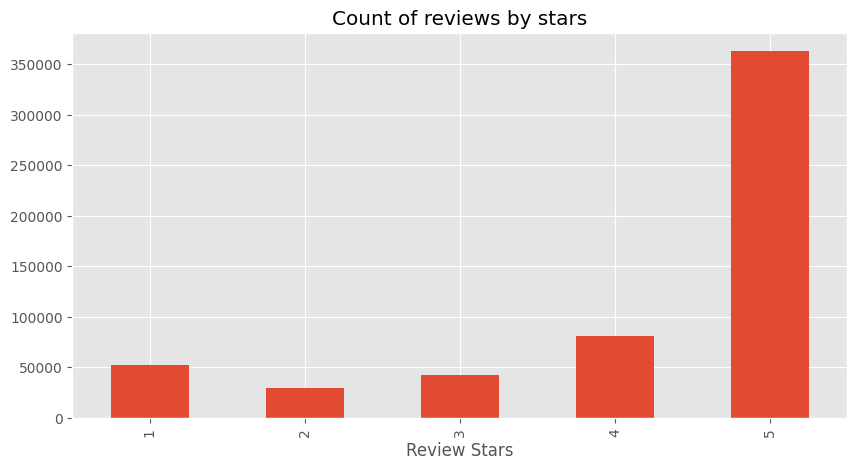

In [14]:
ax = df["Score"].value_counts().sort_index().plot(kind="bar",
                                                   title = "Count of reviews by stars",
                                                   figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

Basic NLTK

In [15]:
example = df["Text"][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [16]:
tokens=nltk.word_tokenize(example)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [17]:
tagged=nltk.pos_tag(tokens)#pos=part of speech and these DT, NN are its part of speech and you can see its meaning or fullform by dugdugo 
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [18]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


using VADER for sentimental analysis

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [21]:
sia.polarity_scores("these is worst thing ever")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [22]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [23]:
# run the polarity sore on the entire dataset
result = {}
for i , row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [24]:
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={"index" : "Id"})
vaders=vaders.merge(df, how="left")


In [25]:
vaders.head() #Now we have sentiment score and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot VADER results

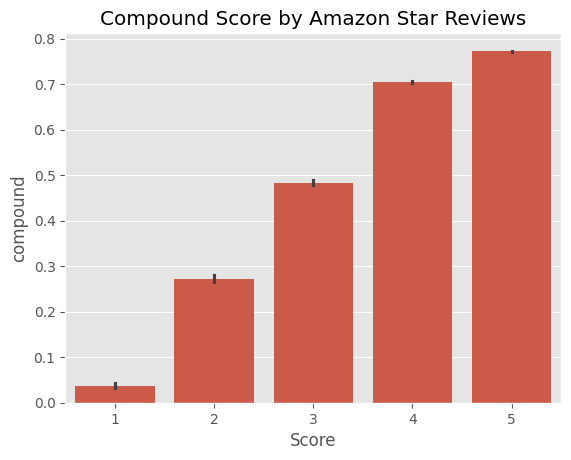

In [26]:
ax=sns.barplot(data=vaders, x='Score' , y = 'compound')
ax.set_title("Compound Score by Amazon Star Reviews")
plt.show()

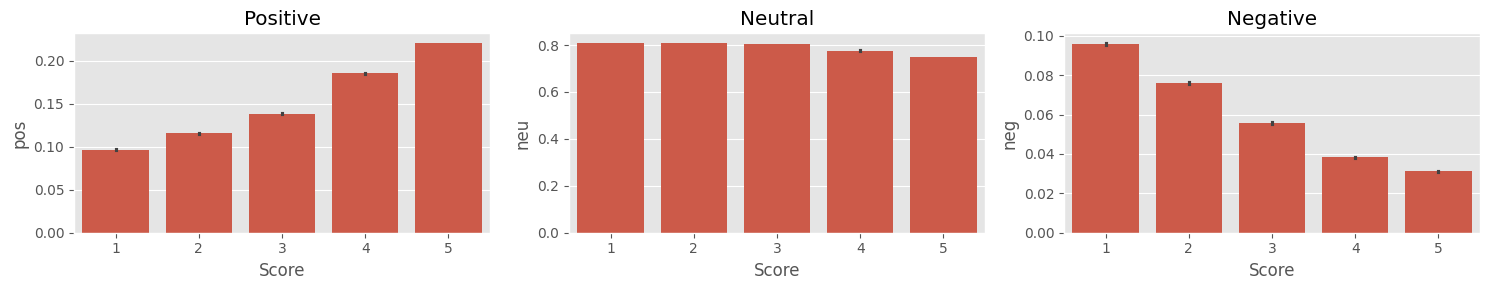

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()


            

Roberta Pretrained Model

In [28]:

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [30]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [31]:
encoded_text=tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2],
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


In [32]:
# Define a function to get polarity scores using RoBERTa model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    

    return scores_dict


In [51]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key , value in vader_result.items():
            vader_result_rename[f"vader_{key}"] =value
        roberta_result = polarity_scores_roberta(text)
        both={**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError: 
        print(f"Broke for id {myid}")





  0%|                                                                           | 82/568454 [00:22<31:28:36,  5.02it/s]

Broke for id 83


  0%|                                                                          | 188/568454 [00:50<26:04:14,  6.05it/s]

Broke for id 187


  0%|                                                                          | 528/568454 [02:29<63:48:47,  2.47it/s]

Broke for id 529


  0%|                                                                          | 539/568454 [02:32<35:58:43,  4.38it/s]

Broke for id 540


  0%|                                                                          | 745/568454 [03:35<71:42:20,  2.20it/s]

Broke for id 746


  0%|                                                                          | 864/568454 [04:09<32:54:23,  4.79it/s]

Broke for id 863


  0%|▏                                                                        | 1052/568454 [05:05<41:16:12,  3.82it/s]

Broke for id 1053


  0%|▏                                                                        | 1071/568454 [05:10<28:56:41,  5.45it/s]

Broke for id 1070


  0%|▏                                                                        | 1157/568454 [05:35<25:22:17,  6.21it/s]

Broke for id 1156


  0%|▏                                                                        | 1320/568454 [06:21<43:03:37,  3.66it/s]

Broke for id 1321


  0%|▏                                                                        | 1374/568454 [06:35<92:17:03,  1.71it/s]

Broke for id 1375


  0%|▏                                                                        | 1497/568454 [07:16<33:56:08,  4.64it/s]

Broke for id 1498


  0%|▏                                                                       | 1574/568454 [07:44<107:36:32,  1.46it/s]

Broke for id 1575


  0%|▏                                                                        | 1797/568454 [08:48<20:26:07,  7.70it/s]

Broke for id 1796


  0%|▏                                                                        | 1827/568454 [08:56<35:46:16,  4.40it/s]

Broke for id 1826


  0%|▎                                                                        | 2168/568454 [10:49<46:08:08,  3.41it/s]

Broke for id 2169


  0%|▎                                                                        | 2247/568454 [11:14<38:14:52,  4.11it/s]

Broke for id 2248


  0%|▎                                                                        | 2475/568454 [12:25<55:37:57,  2.83it/s]

Broke for id 2476


  0%|▎                                                                        | 2493/568454 [12:34<31:08:58,  5.05it/s]

Broke for id 2492


  0%|▎                                                                        | 2583/568454 [13:00<33:56:28,  4.63it/s]

Broke for id 2584


  0%|▎                                                                        | 2609/568454 [13:08<62:43:37,  2.51it/s]

Broke for id 2610


  1%|▎                                                                        | 2896/568454 [31:31<40:36:13,  3.87it/s]

Broke for id 2897
Broke for id 2898


  1%|▎                                                                        | 2901/568454 [31:31<21:31:01,  7.30it/s]

Broke for id 2902


  1%|▍                                                                        | 2929/568454 [31:38<30:17:02,  5.19it/s]

Broke for id 2928


  1%|▍                                                                        | 2943/568454 [31:41<31:44:30,  4.95it/s]

Broke for id 2942
Broke for id 2944


  1%|▍                                                                        | 2946/568454 [31:41<29:39:13,  5.30it/s]

Broke for id 2947
Broke for id 2948


  1%|▍                                                                        | 3022/568454 [31:57<20:18:51,  7.73it/s]

Broke for id 3022
Broke for id 3023


  1%|▍                                                                        | 3024/568454 [31:57<19:36:59,  8.01it/s]

Broke for id 3025


  1%|▍                                                                        | 3305/568454 [33:18<44:56:00,  3.49it/s]

Broke for id 3306


  1%|▍                                                                        | 3789/568454 [35:35<29:21:36,  5.34it/s]

Broke for id 3788


  1%|▌                                                                        | 3968/568454 [36:23<32:12:21,  4.87it/s]

Broke for id 3969


  1%|▌                                                                        | 4108/568454 [37:10<36:47:21,  4.26it/s]

Broke for id 4107


  1%|▌                                                                        | 4109/568454 [37:10<42:13:40,  3.71it/s]

Broke for id 4110


  1%|▌                                                                        | 4306/568454 [38:17<72:42:51,  2.16it/s]

Broke for id 4307


  1%|▌                                                                       | 4315/568454 [38:24<161:40:01,  1.03s/it]

Broke for id 4316


  1%|▌                                                                        | 4410/568454 [38:42<13:29:54, 11.61it/s]

Broke for id 4408


  1%|▌                                                                        | 4484/568454 [38:53<37:34:24,  4.17it/s]

Broke for id 4483


  1%|▌                                                                        | 4511/568454 [39:01<29:10:58,  5.37it/s]

Broke for id 4512


  1%|▌                                                                        | 4552/568454 [39:09<24:14:19,  6.46it/s]

Broke for id 4553


  1%|▌                                                                        | 4582/568454 [39:15<41:31:02,  3.77it/s]

Broke for id 4583


  1%|▋                                                                        | 5041/568454 [40:26<20:02:07,  7.81it/s]

Broke for id 5040


  1%|▋                                                                        | 5183/568454 [40:46<16:47:15,  9.32it/s]

Broke for id 5182


  1%|▋                                                                        | 5191/568454 [40:48<33:50:48,  4.62it/s]

Broke for id 5192


  1%|▋                                                                        | 5363/568454 [41:11<25:05:09,  6.24it/s]

Broke for id 5365


  1%|▋                                                                        | 5440/568454 [41:26<34:23:46,  4.55it/s]

Broke for id 5442


  1%|▋                                                                        | 5710/568454 [42:06<17:06:01,  9.14it/s]

Broke for id 5709


  1%|▊                                                                        | 5997/568454 [42:49<17:42:49,  8.82it/s]

Broke for id 5998


  1%|▊                                                                        | 6004/568454 [42:50<22:41:04,  6.89it/s]

Broke for id 6003


  1%|▊                                                                        | 6008/568454 [42:51<26:21:42,  5.93it/s]

Broke for id 6007


  1%|▊                                                                        | 6108/568454 [43:04<15:51:56,  9.85it/s]

Broke for id 6106


  1%|▊                                                                        | 6235/568454 [43:23<25:35:34,  6.10it/s]

Broke for id 6234


  1%|▊                                                                        | 6559/568454 [44:12<22:14:25,  7.02it/s]

Broke for id 6558


  1%|▊                                                                        | 6650/568454 [44:26<41:42:34,  3.74it/s]

Broke for id 6651


  1%|▊                                                                        | 6799/568454 [44:59<25:32:10,  6.11it/s]

Broke for id 6798


  1%|▉                                                                        | 6837/568454 [45:07<35:02:51,  4.45it/s]

Broke for id 6838


  1%|▉                                                                        | 6849/568454 [45:10<44:57:06,  3.47it/s]

Broke for id 6850


  1%|▉                                                                        | 6887/568454 [45:17<16:59:34,  9.18it/s]

Broke for id 6886


  1%|▉                                                                        | 6906/568454 [45:20<26:59:31,  5.78it/s]

Broke for id 6905


  1%|▉                                                                        | 6954/568454 [45:29<24:44:54,  6.30it/s]

Broke for id 6955


  1%|▉                                                                        | 7076/568454 [45:48<31:40:21,  4.92it/s]

Broke for id 7077


  1%|▉                                                                        | 7087/568454 [45:50<20:41:06,  7.54it/s]

Broke for id 7088


  1%|▉                                                                        | 7202/568454 [46:12<17:44:34,  8.79it/s]

Broke for id 7201


  1%|▉                                                                        | 7603/568454 [47:07<21:46:32,  7.15it/s]

Broke for id 7604


  1%|▉                                                                        | 7608/568454 [47:08<15:03:49, 10.34it/s]

Broke for id 7608


  1%|▉                                                                        | 7672/568454 [47:15<15:16:16, 10.20it/s]

Broke for id 7671


  1%|▉                                                                        | 7702/568454 [47:21<19:50:02,  7.85it/s]

Broke for id 7701


  1%|█                                                                        | 7811/568454 [47:34<15:55:26,  9.78it/s]

Broke for id 7810


  1%|█                                                                        | 7909/568454 [47:46<19:23:22,  8.03it/s]

Broke for id 7907


  1%|█                                                                        | 8078/568454 [48:12<15:24:43, 10.10it/s]

Broke for id 8077


  1%|█                                                                        | 8132/568454 [48:18<14:58:49, 10.39it/s]

Broke for id 8131


  1%|█                                                                        | 8267/568454 [48:35<17:27:46,  8.91it/s]

Broke for id 8266


  2%|█                                                                        | 8739/568454 [49:32<20:26:44,  7.60it/s]

Broke for id 8740


  2%|█                                                                        | 8758/568454 [49:35<14:54:18, 10.43it/s]

Broke for id 8757


  2%|█▏                                                                       | 8937/568454 [49:57<11:47:06, 13.19it/s]

Broke for id 8935


  2%|█▏                                                                       | 9591/568454 [51:15<20:51:24,  7.44it/s]

Broke for id 9590


  2%|█▎                                                                       | 9851/568454 [51:53<21:14:47,  7.30it/s]

Broke for id 9850


  2%|█▎                                                                       | 9882/568454 [51:56<17:11:58,  9.02it/s]

Broke for id 9881


  2%|█▎                                                                       | 9911/568454 [52:00<24:32:19,  6.32it/s]

Broke for id 9910


  2%|█▎                                                                       | 9924/568454 [52:03<21:45:45,  7.13it/s]

Broke for id 9923


  2%|█▎                                                                      | 10003/568454 [52:13<21:37:40,  7.17it/s]

Broke for id 10002


  2%|█▎                                                                      | 10006/568454 [52:14<23:27:04,  6.61it/s]

Broke for id 10005


  2%|█▎                                                                      | 10030/568454 [52:17<17:49:33,  8.70it/s]

Broke for id 10031


  2%|█▎                                                                      | 10549/568454 [53:23<30:48:08,  5.03it/s]

Broke for id 10550


  2%|█▎                                                                      | 10836/568454 [54:07<25:51:20,  5.99it/s]

Broke for id 10837


  2%|█▍                                                                      | 10865/568454 [54:11<13:15:17, 11.69it/s]

Broke for id 10861
Broke for id 10862
Broke for id 10863
Broke for id 10864


  2%|█▍                                                                      | 10887/568454 [54:13<15:31:16,  9.98it/s]

Broke for id 10885


  2%|█▍                                                                      | 10925/568454 [54:19<17:18:07,  8.95it/s]

Broke for id 10924


  2%|█▍                                                                      | 10948/568454 [54:22<13:53:38, 11.15it/s]

Broke for id 10946


  2%|█▍                                                                      | 10968/568454 [54:26<36:05:10,  4.29it/s]

Broke for id 10969


  2%|█▍                                                                      | 11115/568454 [54:47<16:10:13,  9.57it/s]

Broke for id 11114


  2%|█▍                                                                      | 11241/568454 [55:06<11:18:41, 13.68it/s]

Broke for id 11238
Broke for id 11239


  2%|█▍                                                                      | 11247/568454 [55:07<15:12:14, 10.18it/s]

Broke for id 11245


  2%|█▍                                                                      | 11303/568454 [55:14<13:12:21, 11.72it/s]

Broke for id 11302


  2%|█▍                                                                      | 11375/568454 [55:26<45:14:48,  3.42it/s]


IndexError: index out of range in self

In [52]:
both

{'vader_neg': 0.011,
 'vader_neu': 0.743,
 'vader_pos': 0.246,
 'vader_compound': 0.9889,
 'roberta_neg': 0.0019001372,
 'roberta_neu': 0.008368494,
 'roberta_pos': 0.9897314}

In [55]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={"index":"Id"})
results_df=results_df.merge(df, how="left")

In [56]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [57]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Compare Score Betwen modes

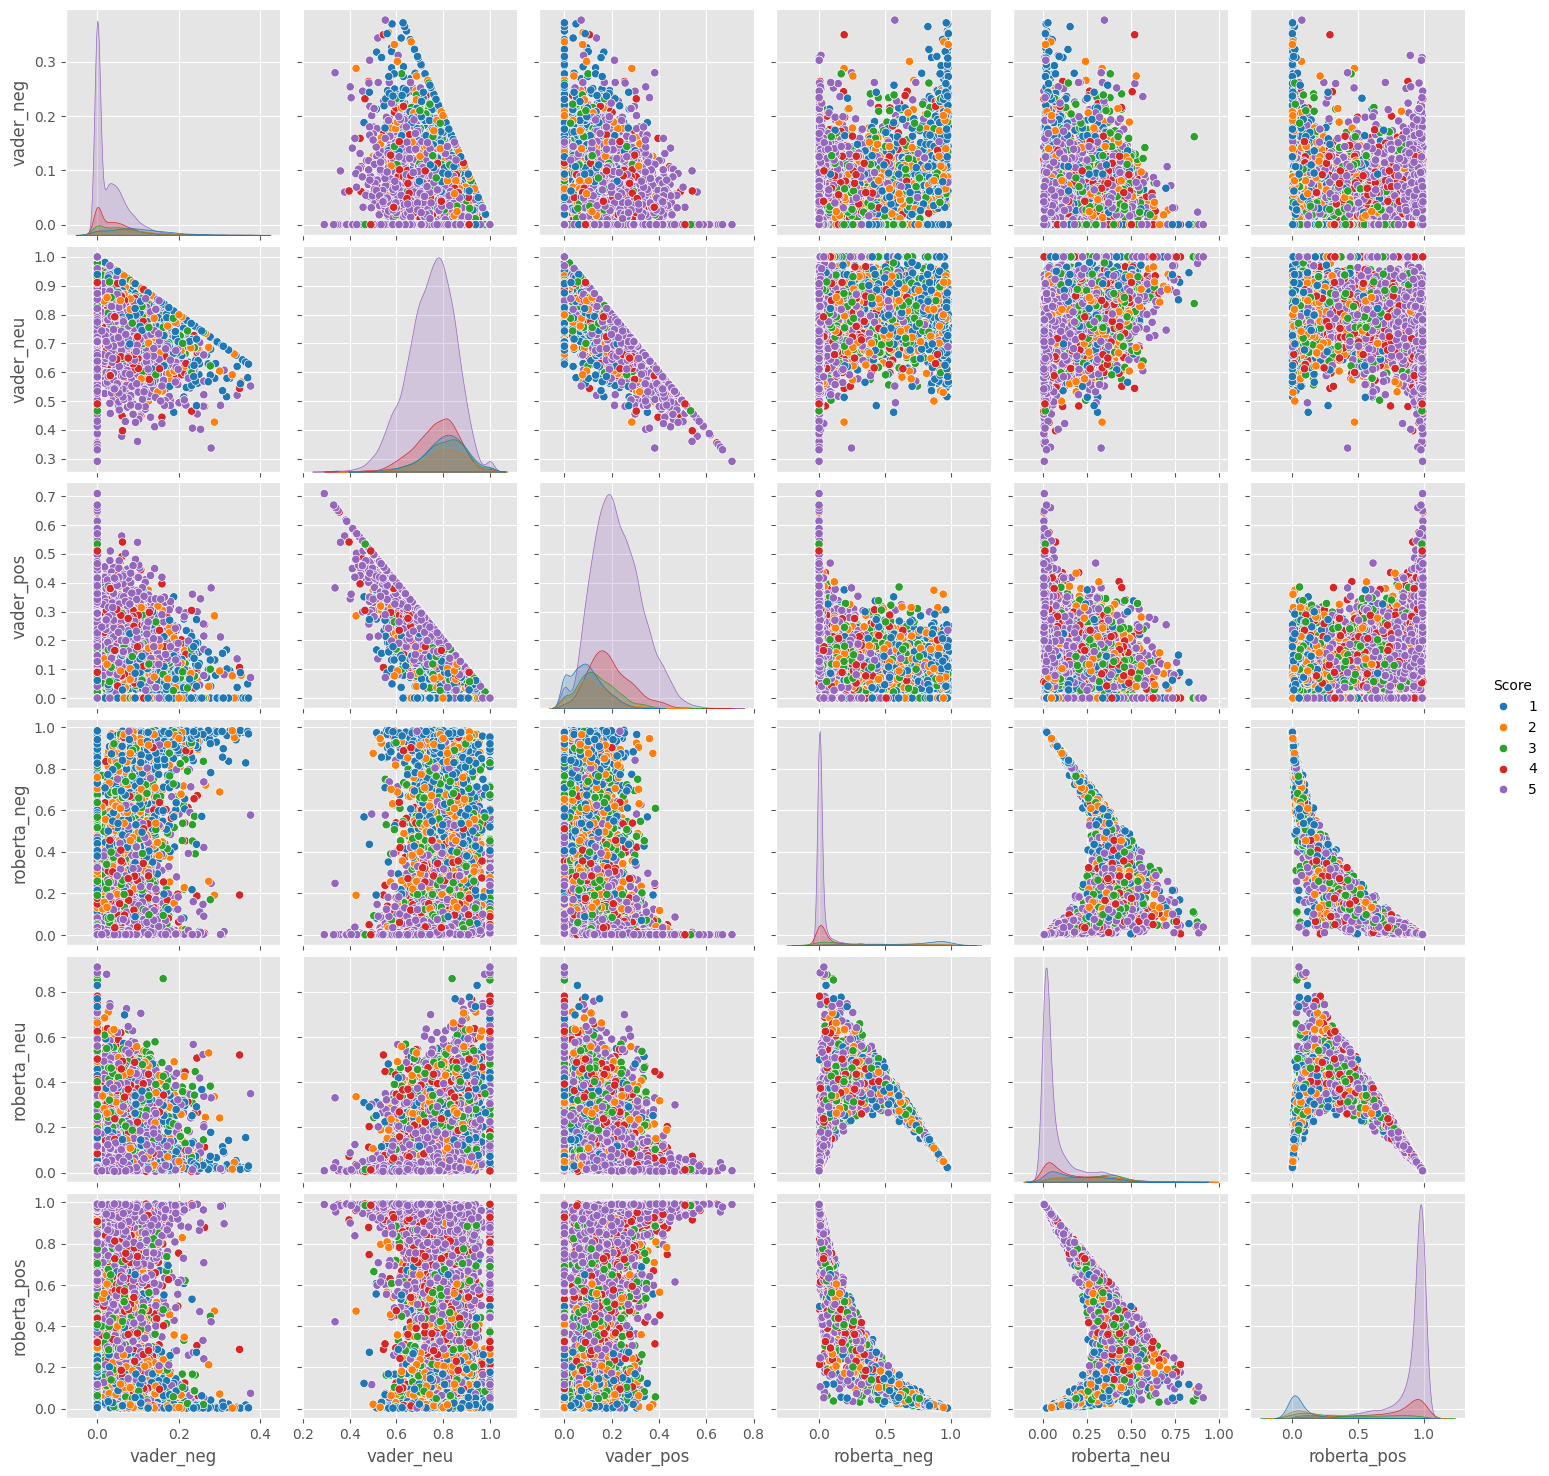

In [59]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()
                   

Review examples

In [62]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [63]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

negative sentiment 5-star review

In [65]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'THEY ARE DELICIOUS NOT SALTY YOU CAN SIT AND EAT 2-3 2 OUNCE BAGS AT A TIME I GIVE THESE 5 STARS PLUS I HAVE TO STOP MYSELF FROM EATING THEM THEY ARE DELICIOUS.'

In [66]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

easily

In [72]:
from transformers import pipeline
# Initialize the sentiment analysis pipeline with PyTorch
sent_pipeline = pipeline("sentiment-analysis", framework="pt")
result = sent_pipeline("I love using this sentiment analysis model!")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9994949102401733}]
